In [1]:
import numpy as np 
import pickle
from matplotlib import pyplot as plt
from galpy.util import coords as coords
import os
import sys
!hostname

c422-012.stampede2.tacc.utexas.edu


In [2]:
start=0
end=510

datapath="/work2/07428/binod/stampede2/LRBB-IoMW/"
plotpath="/home1/07428/binod/work2/resonance_sweeping_low_res_sims/"
angle_datapath="/home1/07428/binod/work2/resonance_sweeping_low_res_sims/"
#datafilename=str(start)+"_to_"+str(end)+"_fft_barangles_sim_low_res.ang"
#ang_stored = open(angle_datapath+datafilename,'rb')
#all_bangles=pickle.load(ang_stored)
#print(len(all_bangles))

barstuff=np.genfromtxt('bar_angles_raw.txt') #change the name of file based on where you saved 
time=barstuff[:,0]
all_bangles=barstuff[:,1]


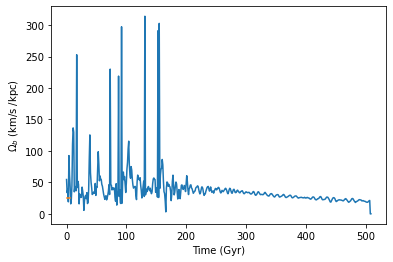

In [10]:
#angle=np.rad2deg(all_bangles)
angle=all_bangles
TU=0.00977
PS=np.empty(len(angle-1))
for i in range(1,len(angle)-1):
    PS[i-1]=(angle[i]-angle[i-1])/TU
    if angle[i]<angle[i-1]:
        diff=angle[i]-angle[i-1]
        ang_diff=angle[i]+np.pi-angle[i-1]
        #print("angle[i]<angle[i-1]",diff,ang_diff)
        PS[i-1]=ang_diff/TU
          
    if PS[i-1]<0.:
        ang_diff=angle[i]+2*np.pi-angle[i-1]
        #print(ang_diff)
        PS[i-1]=ang_diff/TU
        print(PS[i-1])
PS=PS*3.08567758/3.15576
plt.plot(time,PS)
plt.plot([0,5],[26,26])
#plt.ylim(25,30)
plt.ylabel(r'$\Omega_b$ (km/s /kpc)')
plt.xlabel('Time (Gyr)')
plt.show()

In [11]:
times=np.genfromtxt(datapath+'times.txt',dtype='str')
#print(len(times))
time=list()
for i in range(end): #goto len(times) if you want to seek for all times that are calculated so far
    t=float(times[i][11:-2])/1000 # in Gyr
    time.append(t)
#plt.plot(all_bangles)
time=np.array(time)
time=time*9.778145
print(len(time))

510


In [12]:
print(time[509]*1000-time[508]*1000)

9.779122814500624


In [13]:
print(time[500]) # in Gyr

4.898856511887001


In [ ]:
dadtz=PS

fig5=plt.figure(figsize=(10,3))
ax=fig5.add_subplot(111)
ax.set_xlabel("t (Gyr)")
ax.set_ylabel("$\Omega$$_{bar}$ $kms^{-1}kpc^{-1}$")

ax.plot(time,dadtz)
ax.set_ylim(0,130)
ax.set_xlim(1.5,5.0)

time_A=205
time_B=307
time_C=505
ax.axvline(x=time[time_A],c='blue',linestyle='--',lw=0.8)
ax.axvline(x=time[time_B],c='blue',linestyle='--',lw=0.8)
ax.axvline(x=time[time_C],c='red',linestyle='--',lw=0.8)

#shading from A to B
ax.axvspan(time[time_A], time[time_B], color='y', alpha=0.4, lw=0.8)
#shading from B to C
ax.axvspan(time[time_B], time[time_C], color='y', alpha=0.4, lw=0.7)

eta1=(dadtz[time_B]-dadtz[time_A])
eta1=abs(eta1)
ax.text(time[210],100,r"$\Delta$$\Omega$$_{bar}$="+str(round(eta1,2)),color="blue")
ax.text(time[210],90,r"$\Delta$t="+str(round(time[time_B]-time[time_A],2))+"Gyr",color="blue")
ax.text(time[210],80,r"$\Omega$$_{bar}$="+str(round(dadtz[time_A],2)),color="blue")

ax.annotate(text='',xy=(time[time_B],110), xytext=(time[time_A],110), arrowprops=dict(edgecolor='blue',arrowstyle='<->'))

#Looking over a larger range


eta=(dadtz[time_C]-dadtz[time_A])
eta=abs(eta)
db_dt=eta/(time[time_C]-time[time_A])
ax.text(time[350],60,r"$\Delta$$\Omega$$_{bar}$="+str(round(eta,2)),color="red")
ax.text(time[350],50,r"$\Delta$t="+str(round(time[time_C]-time[time_A],2))+"Gyr",color="red")

ax.text(time[350],80,r"$\frac{{\Delta}{\Omega}_{bar}}{{\Delta}{t}}$ ="+str(round(db_dt,2))+" $kms^{-1}kpc^{-1}Gyr^{-1}$",color="red")

ax.annotate(text='',xy=(time[time_C],70), xytext=(time[time_A],70), arrowprops=dict(edgecolor='red',arrowstyle='<->'))

ax.text(time[465],60,r"$\Omega$$_{bar}$="+str(round(dadtz[time_C],2)),color="red")


#ax.scatter(time[200],dadtz[200],c="red",s=10)
ax.minorticks_on()
#print(last)
plotname="da_dt_vs_time_low_res_sims_fft_method_kms_kpc_r_1_4.jpg"
print("Plot generated and saved to file: ",plotname)
#fig5.savefig(plotname,bbox_inches="tight",dpi=200)
#plt.tight_layout()
plt.show()

#37-40 km/s/kpc

# Calculating pattern speed using numpy functions

Plot generated and saved to file:  da_dt_vs_time.jpg


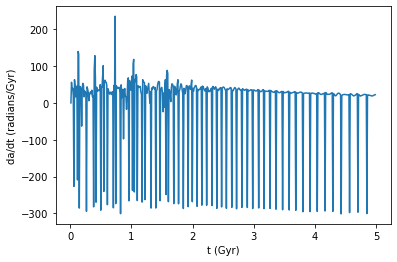

In [15]:
d_angle=np.diff(all_bangles)
#print(d_angle)
dt=np.diff(time)
da_dt=d_angle/dt
zero=np.array([0])
da_dt_z=np.concatenate((zero,da_dt))
#print(da_dt)
#print(d_angle)

fig2=plt.figure()
ax=fig2.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
ax.set_xlabel("t (Gyr)")
ax.set_ylabel("da/dt (radians/Gyr)")
bangle_radians=np.deg2rad(all_bangles)
ax.plot(time,da_dt_z)
plotname="da_dt_vs_time.jpg"
#fig2.savefig(plotpath+plotname,bbox_inches="tight")
print("Plot generated and saved to file: ",plotname)
#plt.tight_layout()
plt.show()

# Calculating da_dt numerically (my method)


# Converting all angles to positive

In [16]:
#converted all angles to positive
a=np.array(all_bangles)
for i in range(len(a)):
    if (a[i]<0):
        a[i]=2*np.pi+a[i]
t=time

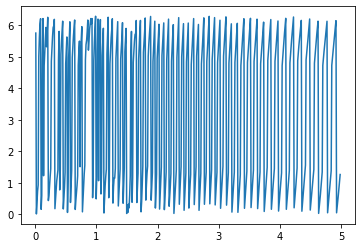

In [17]:
plt.plot(t,a)

Snapshot 1.000000 : 0.647192 - 329.349651 = -328.702459
da <0 found at Snapshot  1
da is now 31.297541101532794
Snapshot 2.000000 : 19.957346 - 0.647192 = 19.310154
Snapshot 3.000000 : 42.318118 - 19.957346 = 22.360772
Snapshot 4.000000 : 53.336372 - 42.318118 = 11.018253
Snapshot 5.000000 : 286.376413 - 53.336372 = 233.040041
d_a > 180 found at Snapshot  5
da is now:  53.0400411573919
Snapshot 6.000000 : 321.708549 - 286.376413 = 35.332136
Snapshot 7.000000 : 346.363433 - 321.708549 = 24.654884
Snapshot 8.000000 : 355.525330 - 346.363433 = 9.161898
Snapshot 9.000000 : 8.946329 - 355.525330 = -346.579001
da <0 found at Snapshot  9
da is now 13.420998916527703
Snapshot 10.000000 : 34.553211 - 8.946329 = 25.606882
Snapshot 11.000000 : 277.540716 - 34.553211 = 242.987505
d_a > 180 found at Snapshot  11
da is now:  62.987505213335226
Snapshot 12.000000 : 355.763535 - 277.540716 = 78.222818
Snapshot 13.000000 : 70.103965 - 355.763535 = -285.659570
da <0 found at Snapshot  13
da is now 74.34

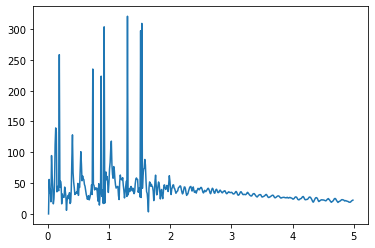

In [19]:
a=np.rad2deg(a)
dadt=list()
da=list()
for i in range(1,len(t),1):
    #d=(a[i-1]-a[i])/(t[i-1]-t[i])
    d_a=(a[i]-a[i-1])
    print("Snapshot %f : %f - %f = %f"%(i,a[i],a[i-1],d_a))
    d_t=(t[i]-t[i-1])
    if d_a<0:
        print("da <0 found at Snapshot ",i)
        d_a=a[i]+(360-a[i-1])  #if change in angle is negative, it is due to crossing the origin
        print("da is now",d_a)
    if d_a>180:                #if change in angle is greater than 180, the change in angle value we have is flipped by 180
        print("d_a > 180 found at Snapshot ",i)
        d_a=d_a-180
        print("da is now: ",d_a)    
    da.append(d_a)
    #print(d_a)
    d_a_rad=np.deg2rad(d_a)
    d=d_a_rad/d_t
    dadt.append(d)

dadt=np.array(dadt)

zero=np.array([0])
dadtz=np.concatenate((zero,dadt))
#print(len(dadt))
#print(dadt)
plt.plot(time,dadtz)

# Saving the pattern speed (frequency) of the bar in pickle file

In [42]:

#datafilename="low_res_sims_saved_bar_pattern_speed_km_per_s_kpc.ang"
#save_datapath="/mnt/home/bbhattarai/resonance_sweeping/New_Sims_Analysis/"
#dadtz_kms_kpc=dadtz*3.08567758/3.15576
#with open(datafilename, 'wb') as output:
#        pickle.dump(dadtz_kms_kpc, output)



Plot generated and saved to file:  da_dt_vs_time_low_res_sims_fft_method_kms_kpc_r_1_4.jpg


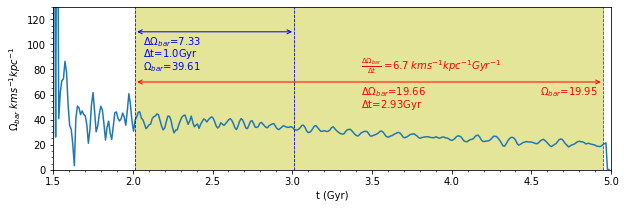

In [34]:
fig6=plt.figure(figsize=(10,3))
ax=fig6.add_subplot(111)
ax.set_xlabel("t (Gyr)")
ax.set_ylabel("$\Omega$$_{bar}$ $kms^{-1}kpc^{-1}$")

ax.plot(time,dadtz)
ax.set_ylim(0,130)
ax.set_xlim(1.5,5.0)

time_A=205
time_B=307
time_C=505
ax.axvline(x=time[time_A],c='blue',linestyle='--',lw=0.8)
ax.axvline(x=time[time_B],c='blue',linestyle='--',lw=0.8)
ax.axvline(x=time[time_C],c='red',linestyle='--',lw=0.8)

#shading from A to B
ax.axvspan(time[time_A], time[time_B], color='y', alpha=0.4, lw=0.8)
#shading from B to C
ax.axvspan(time[time_B], time[time_C], color='y', alpha=0.4, lw=0.7)

eta1=(dadtz[time_B]-dadtz[time_A])
eta1=abs(eta1)
ax.text(time[210],100,r"$\Delta$$\Omega$$_{bar}$="+str(round(eta1,2)),color="blue")
ax.text(time[210],90,r"$\Delta$t="+str(round(time[time_B]-time[time_A],2))+"Gyr",color="blue")
ax.text(time[210],80,r"$\Omega$$_{bar}$="+str(round(dadtz[time_A],2)),color="blue")

ax.annotate(text='',xy=(time[time_B],110), xytext=(time[time_A],110), arrowprops=dict(edgecolor='blue',arrowstyle='<->'))

#Looking over a larger range


eta=(dadtz[time_C]-dadtz[time_A])
eta=abs(eta)
db_dt=eta/(time[time_C]-time[time_A])
ax.text(time[350],60,r"$\Delta$$\Omega$$_{bar}$="+str(round(eta,2)),color="red")
ax.text(time[350],50,r"$\Delta$t="+str(round(time[time_C]-time[time_A],2))+"Gyr",color="red")

ax.text(time[350],80,r"$\frac{{\Delta}{\Omega}_{bar}}{{\Delta}{t}}$ ="+str(round(db_dt,2))+" $kms^{-1}kpc^{-1}Gyr^{-1}$",color="red")

ax.annotate(text='',xy=(time[time_C],70), xytext=(time[time_A],70), arrowprops=dict(edgecolor='red',arrowstyle='<->'))

ax.text(time[465],60,r"$\Omega$$_{bar}$="+str(round(dadtz[time_C],2)),color="red")


#ax.scatter(time[200],dadtz[200],c="red",s=10)
ax.minorticks_on()
#print(last)
plotname="da_dt_vs_time_low_res_sims_fft_method_kms_kpc_r_1_4.jpg"
print("Plot generated and saved to file: ",plotname)
#fig6.savefig(plotname,bbox_inches="tight",dpi=200)
#plt.tight_layout()
plt.show()

#37-40 km/s/kpc